In [8]:
pip install eli5 lime dalex neattext 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shree\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [9]:
pip install pandas spacy numpy seaborn

You should consider upgrading via the 'c:\users\shree\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [10]:
pip install altair streamlit scikit-learn

You should consider upgrading via the 'c:\users\shree\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


## Sentiment analysis with Emotion Classifier

In [11]:
# Load EDA packages
import pandas as pd
import numpy as np

# Load data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Load text clean packages
import neattext.functions as nfx

# Load ML packages 
# Estimators 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [12]:
# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
# Load dataset
df = pd.read_csv("data/tweet_emotions.csv")

In [14]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [15]:
# value count
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'empty'),
  Text(1, 0, 'sadness'),
  Text(2, 0, 'enthusiasm'),
  Text(3, 0, 'neutral'),
  Text(4, 0, 'worry'),
  Text(5, 0, 'surprise'),
  Text(6, 0, 'love'),
  Text(7, 0, 'fun'),
  Text(8, 0, 'hate'),
  Text(9, 0, 'happiness'),
  Text(10, 0, 'boredom'),
  Text(11, 0, 'relief'),
  Text(12, 0, 'anger')])

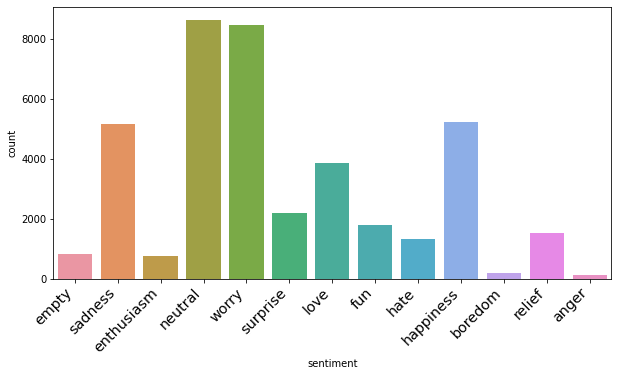

In [16]:
# Plot
plt.figure(figsize=(10,5))
chart = sns.countplot(x = 'sentiment', data = df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

### Data Cleaning

In [22]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [25]:
df['content']

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [27]:
# Data cleaning
# Removing user handles
df['Clean_Text'] = df['content'].apply(nfx.remove_userhandles)

# Removing stop words
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [28]:
df

,tweet_id,sentiment,content,Clean_Text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"want trade Houston tickets, will."
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT S...


In [30]:
# Removing special characters
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

In [31]:
df

,tweet_id,sentiment,content,Clean_Text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freakin
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SINGLE...


### Features and Labels

In [33]:
XFeatures = df['Clean_Text']
ylabels = df['sentiment']

In [35]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(XFeatures, ylabels, test_size = 0.3, random_state = 42)

### Build Pipeline

In [36]:
from sklearn.pipeline import Pipeline

In [38]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps = [('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [39]:
# Train and fit data
pipe_lr.fit(x_train, y_train)

c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [41]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

### Check Accuracy of the model


In [40]:
pipe_lr.score(x_test, y_test)

0.33308333333333334

### Make Prediction

In [43]:
ex1 = "This movie was very interesting, It made me happy and excited !"

In [44]:
pipe_lr.predict([ex1])

array(['happiness'], dtype=object)

In [48]:
ex2 = "This book, It made me cry !"
pipe_lr.predict([ex2])

array(['worry'], dtype=object)

In [49]:
# Prediction probability
pipe_lr.predict_proba([ex1])

array([[3.04123365e-04, 2.12732542e-04, 2.25038990e-04, 1.21651211e-03,
        2.86826357e-03, 6.13313305e-01, 1.64162952e-03, 3.66192226e-01,
        1.48744566e-03, 9.74888035e-04, 1.42627499e-03, 7.86969447e-03,
        2.26786561e-03]])

In [50]:
pipe_lr.predict_proba([ex2])

array([[0.0043376 , 0.00276804, 0.00631118, 0.00277198, 0.00812873,
        0.08479637, 0.04683282, 0.19382333, 0.1084753 , 0.00736089,
        0.17526441, 0.0838053 , 0.27532406]])

In [52]:
# To know the classes
pipe_lr.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [53]:
# Save Model and Pipeline
import joblib
pipeline_file = open("sentiment_classifier_pipe_lr.pkl", "wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()